In [1]:
import pandas as pd
import yfinance as yf
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.io as pio
import os
#from Features import *

## Import data

In [2]:
# Read data for backtest
 
df=pd.read_csv('all_contracts_2015_2024_merged.csv',index_col=0,parse_dates=True)
print(df['Market and Exchange Names'].unique())

['EURO FX - CHICAGO MERCANTILE EXCHANGE'
 'BRITISH POUND STERLING - CHICAGO MERCANTILE EXCHANGE'
 'BRITISH POUND - CHICAGO MERCANTILE EXCHANGE'
 'CANADIAN DOLLAR - CHICAGO MERCANTILE EXCHANGE'
 'SWISS FRANC - CHICAGO MERCANTILE EXCHANGE'
 'JAPANESE YEN - CHICAGO MERCANTILE EXCHANGE'
 'NEW ZEALAND DOLLAR - CHICAGO MERCANTILE EXCHANGE'
 'NZ DOLLAR - CHICAGO MERCANTILE EXCHANGE'
 'AUSTRALIAN DOLLAR - CHICAGO MERCANTILE EXCHANGE'
 'BITCOIN - CHICAGO MERCANTILE EXCHANGE'
 'E-MINI S&P 500 STOCK INDEX - CHICAGO MERCANTILE EXCHANGE'
 'E-MINI S&P 500 - CHICAGO MERCANTILE EXCHANGE'
 'NASDAQ-100 STOCK INDEX (MINI) - CHICAGO MERCANTILE EXCHANGE'
 'NASDAQ MINI - CHICAGO MERCANTILE EXCHANGE'
 'E-MINI RUSSELL 2000 INDEX - CHICAGO MERCANTILE EXCHANGE'
 'RUSSELL E-MINI - CHICAGO MERCANTILE EXCHANGE'
 'BUTTER (CASH SETTLED) - CHICAGO MERCANTILE EXCHANGE'
 'LEAN HOGS - CHICAGO MERCANTILE EXCHANGE'
 'LIVE CATTLE - CHICAGO MERCANTILE EXCHANGE'
 'LUMBER - CHICAGO MERCANTILE EXCHANGE']


In [3]:
df= df[df['Market and Exchange Names']=='EURO FX - CHICAGO MERCANTILE EXCHANGE']
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2283 entries, 2015-01-02 to 2024-01-31
Data columns (total 23 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Open                                 2283 non-null   float64
 1   High                                 2283 non-null   float64
 2   Low                                  2283 non-null   float64
 3   Close                                2283 non-null   float64
 4   Adj Close                            2283 non-null   float64
 5   Volume                               2283 non-null   int64  
 6   Market and Exchange Names            2283 non-null   object 
 7   Open Interest (All)                  2278 non-null   float64
 8   Noncommercial Positions-Long (All)   2278 non-null   float64
 9   Noncommercial Positions-Short (All)  2278 non-null   float64
 10  Commercial Positions-Long (All)      2278 non-null   float64
 11  Commercial P

## Plotting data

In [4]:
dfpl = df[:]

# Create subplots
fig = make_subplots(rows=6, cols=1, shared_xaxes=True, vertical_spacing=0.02, row_heights=[5, 2,1,1,1,1])

    # Add traces to the subplots
fig.add_trace(go.Candlestick(x=dfpl.index,
                             open=dfpl['Open'],
                             high=dfpl['High'],
                             low=dfpl['Low'],
                             close=dfpl['Close']), row=1, col=1)


fig.add_trace(go.Scatter(x=dfpl.index, y=dfpl['Net_Position_Comm'], mode='lines', name=f'Commercial: {dfpl['Net_Position_Comm'].iloc[-1]}', line=dict(color='red')), row=2, col=1)
fig.add_trace(go.Scatter(x=dfpl.index, y=dfpl['Net_Position_NonComm'], mode='lines', name=f'Non-Commercial: {dfpl['Net_Position_NonComm'].iloc[-1]}', line=dict(color='green')), row=2, col=1)
fig.add_trace(go.Scatter(x=dfpl.index, y=dfpl['Net_Position_NonRept'], mode='lines', name=f'Non-Reportable: {dfpl['Net_Position_NonRept'].iloc[-1]}', line=dict(color='blue')), row=2, col=1)

fig.add_trace(go.Scatter(x=dfpl.index, y=dfpl['COT_Index_Comm'], mode='lines', name=f'Commercial Index: {dfpl["COT_Index_Comm"].iloc[-1]}%', line=dict(color='red')), row=3, col=1)
fig.add_trace(go.Scatter(x=dfpl.index, y=dfpl['COT_Index_NonComm'], mode='lines', name=f'Non-Commercial Index: {dfpl["COT_Index_NonComm"].iloc[-1]}%', line=dict(color='green')), row=3, col=1)
fig.add_trace(go.Scatter(x=dfpl.index, y=dfpl['COT_Index_NonRept'], mode='lines', name=f'Non-Reportable Index: {dfpl["COT_Index_NonRept"].iloc[-1]}%', line=dict(color='blue')), row=3, col=1)

fig.add_trace(go.Scatter(x=dfpl.index, y=dfpl['Open Interest (All)'], mode='lines', name=f'Open Interest: {dfpl['Open Interest (All)'].iloc[-1]}', line=dict(color='black')), row=4, col=1)

fig.add_trace(go.Scatter(x=dfpl.index, y=dfpl['COT_Index_OI'], mode='lines', name=f'Open Interest Index: {dfpl["COT_Index_OI"].iloc[-1]}%', line=dict(color='black')), row=5, col=1)

fig.add_trace(go.Scatter(x=dfpl.index, y=dfpl['OI_Percentage_Comm'], mode='lines', name=f'Open Interest Percentage Comm Net: {dfpl["OI_Percentage_Comm"].iloc[-1]}%', line=dict(color='blue')), row=6, col=1)

fig.add_trace(go.Scatter(x=dfpl.index, y=dfpl['OI_Percentage_Short'], mode='lines', name=f'Open Interest Percentage Comm Short: {dfpl["OI_Percentage_Short"].iloc[-1]}%', line=dict(color='red')), row=6, col=1)




# Update layout with specified height and width
fig.update_layout(
    title_text=dfpl['Market and Exchange Names'].iloc[-1],
    showlegend=True,
    height=1000,
    width=1800,
    hovermode= 'x unified')

fig.update_traces(xaxis='x1')

fig.update_xaxes(rangeslider_visible=False)

fig.show()


In [5]:

# Assuming df is your DataFrame
dfpl = df[:]

# Extract the last row values for COT indexes
last_cot_comm = dfpl['COT_Index_Comm'].iloc[-1]
last_cot_noncom = dfpl['COT_Index_NonComm'].iloc[-1]
last_cot_nonrept = dfpl['COT_Index_NonRept'].iloc[-1]
last_cot_oi = dfpl['COT_Index_OI'].iloc[-1]

# Create a bar chart
bar_fig = go.Figure()

# Add bars for COT indexes
bar_fig.add_trace(go.Bar(x=['COT Index Comm', 'COT Index Non-Comm', 'COT Index Non-Rept', 'COT Open Interest'],
                         y=[last_cot_comm, last_cot_noncom, last_cot_nonrept, last_cot_oi],
                         marker=dict(color=['red', 'green', 'blue', 'black']),
                         text=['Commercial', 'Non-Commercial', 'Non-Reportable', 'Open Interest'],
                         name='COT Index'))

# Add horizontal lines at values 25 and 75
bar_fig.add_shape(type='line', x0=-0.5, x1=3.5, y0=25, y1=25, line=dict(color='orange', width=2), name='Threshold 25')
bar_fig.add_shape(type='line', x0=-0.5, x1=3.5, y0=75, y1=75, line=dict(color='purple', width=2), name='Threshold 75')

# Update layout for bar chart
bar_fig.update_layout(
    title_text=f'COT Index Values - {dfpl["Market and Exchange Names"].iloc[-1]}',
    xaxis_title='COT Index Type',
    yaxis_title='Value',
    showlegend=True,
    height=500,
    width=800,
    hovermode='x unified'
)

# Show the bar chart
bar_fig.show()


## Testing Pattern

In [102]:
df['long'] = np.where(((df['COT_Index_NonRept'].shift(-1) - df['COT_Index_NonRept']) > 50), df['Close'], None)
df['short'] = np.where((df['Net_Position_Comm'] < 0) & (df['Net_Position_Comm'].shift(-1) > 0)& (df['COT_Index_Comm'] < 20 ), df['Close'],None)


In [103]:
dfpl = df.iloc[2015:]
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create subplots
fig = make_subplots(rows=5, cols=1, shared_xaxes=True, vertical_spacing=0.05, row_heights=[5, 2,1,1,1])

    # Add traces to the subplots
fig.add_trace(go.Candlestick(x=dfpl.index,
                             open=dfpl['Open'],
                             high=dfpl['High'],
                             low=dfpl['Low'],
                             close=dfpl['Close']), row=1, col=1)
# Plotting entry signals
fig.add_trace(go.Scatter(x=dfpl.index, y=dfpl['long'], mode='markers', name='long', line=dict(color='blue')), row=1, col=1)
fig.add_trace(go.Scatter(x=dfpl.index, y=dfpl['short'], mode='markers', name='short', line=dict(color='red')), row=1, col=1)

fig.add_trace(go.Scatter(x=dfpl.index, y=dfpl['Net_Position_Comm'], mode='lines', name='Commercial', line=dict(color='red')), row=2, col=1)
fig.add_trace(go.Scatter(x=dfpl.index, y=dfpl['Net_Position_NonComm'], mode='lines', name='Non-Commercial', line=dict(color='green')), row=2, col=1)
fig.add_trace(go.Scatter(x=dfpl.index, y=dfpl['Net_Position_NonRept'], mode='lines', name='Non-Reportable', line=dict(color='blue')), row=2, col=1)

fig.add_trace(go.Scatter(x=dfpl.index, y=dfpl['COT_Index_Comm'], mode='lines', name=f'Commercial Index: {dfpl["COT_Index_Comm"].iloc[-1]}%', line=dict(color='red')), row=3, col=1)
fig.add_trace(go.Scatter(x=dfpl.index, y=dfpl['COT_Index_NonComm'], mode='lines', name=f'Non-Commercial Index: {dfpl["COT_Index_NonComm"].iloc[-1]}%', line=dict(color='green')), row=3, col=1)
fig.add_trace(go.Scatter(x=dfpl.index, y=dfpl['COT_Index_NonRept'], mode='lines', name=f'Non-Reportable Index: {dfpl["COT_Index_NonRept"].iloc[-1]}%', line=dict(color='blue')), row=3, col=1)

fig.add_trace(go.Scatter(x=dfpl.index, y=dfpl['Open Interest (All)'], mode='lines', name='Open Interest', line=dict(color='black')), row=4, col=1)

fig.add_trace(go.Scatter(x=dfpl.index, y=dfpl['COT_Index_OI'], mode='lines', name=f'Open Interest Index: {dfpl["COT_Index_OI"].iloc[-1]}%', line=dict(color='black')), row=5, col=1)

# Add horizontal lines
fig.add_shape(
    dict(type="line", x0=dfpl.index.min(), x1=dfpl.index.max(), y0=20, y1=20, line=dict(color="gray", width=1)),
    row=3, col=1
)

fig.add_shape(
    dict(type="line", x0=dfpl.index.min(), x1=dfpl.index.max(), y0=80, y1=80, line=dict(color="gray", width=1)),
    row=3, col=1
)

fig.add_shape(
    dict(type="line", x0=dfpl.index.min(), x1=dfpl.index.max(), y0=20, y1=20, line=dict(color="gray", width=1)),
    row=5, col=1
)

fig.add_shape(
    dict(type="line", x0=dfpl.index.min(), x1=dfpl.index.max(), y0=80, y1=80, line=dict(color="gray", width=1)),
    row=5, col=1
)
# Update layout with specified height and width
fig.update_layout(
    title_text=dfpl['Market and Exchange Names'].iloc[-1],
    showlegend=True,
    height=1000,
    width=1800,
    xaxis_rangeslider_visible=False
    )

fig.show()

# Backtest

In [ ]:
position = None
cumulative_profit = 0
trades = []
cost = 0.0001
trailing = False

for i in range(1, len(df)):
    prev_row = df.iloc[i - 1]
    current_row = df.iloc[i]
    trading_time = current_row['hour'] > 9 and current_row['hour'] < 20
    
    # Slightly relaxed Long Entry Condition
    long_entry =  current_row['spike_down_band'] < current_row['spike_down'] and trading_time and current_row['signal'] > 0 #and current_row['RSI'] < 30
    short_entry = current_row['spike_up_band'] < current_row['spike_up'] and trading_time and current_row['signal'] > 0 #and current_row['RSI'] > 70


    #long_exit = current_row['Close'] > current_row['MA']
    #short_exit =  current_row['Close'] < current_row['MA']


    # Check for long entry condition
    if position is None and long_entry:
        entry_price = current_row['close']+cost
        entry_time = df.index[i]  
        tp_price = entry_price + current_row['ATR'] * 5
        sl_price = entry_price - current_row['ATR'] * 3
        position = 'long'
    
    elif trailing == True and position == 'long' and not (current_row['low'] < sl_price or current_row['high'] > tp_price) and current_row['close'] > entry_price:
        sl_price = current_row['close'] - current_row['ATR'] * 3 


    # Check for long exit condition
    elif position == 'long' and (current_row['low'] < sl_price or current_row['high'] > tp_price):
        if current_row['low'] < sl_price and current_row['high'] > tp_price:
            if current_row['low_time'] < current_row['high_time']:
                exit_price = sl_price
            elif current_row['high_time'] < current_row['low_time']:
                exit_price = tp_price
        elif current_row['high'] > tp_price:
            exit_price = tp_price
        elif current_row['low'] < sl_price:
            exit_price = sl_price
        # else if I have exit condition
        #else:
            #exit_price = current_row['close']

        exit_time = df.index[i]  # Capturing the exit time
        pnl = exit_price - entry_price
        cumulative_profit += pnl
        trades.append({'Type': 'Long', 'Entry Price': entry_price, 'Exit Price': exit_price, 'Entry Time': entry_time, 'Exit Time': exit_time, 'PnL': pnl, 'Cumulative Profit': cumulative_profit})
        position = None

    # Check for short entry condition
    elif position is None and short_entry:
        entry_price = current_row['close'] - cost
        entry_time = df.index[i] 
        tp_price = entry_price - current_row['ATR'] * 5
        sl_price = entry_price + current_row['ATR'] * 3
        position = 'short'

    elif trailing == True and  position == 'short' and not (current_row['high'] > sl_price or current_row['low'] < tp_price) and current_row['close'] < entry_price :
        sl_price = current_row['close'] + current_row['ATR'] * 3



    # Check for short exit condition
    elif position == 'short' and (current_row['high'] > sl_price or current_row['low'] < tp_price):
        if current_row['high'] > sl_price and current_row['low'] < tp_price:
            if current_row['high_time'] < current_row['low_time']:
                exit_price = sl_price
            elif current_row['low_time'] < current_row['high_time']:
                exit_price = tp_price
        elif current_row['high'] > sl_price:
            exit_price = sl_price
        elif current_row['low'] < tp_price:
            exit_price = tp_price
        # else if I have exit condition
        #else:
           #exit_price = current_row['close']
 
        exit_time = df.index[i]  # Capturing the exit time
        pnl = entry_price - exit_price
        cumulative_profit += pnl
        trades.append({'Type': 'Short', 'Entry Price': entry_price, 'Exit Price': exit_price, 'Entry Time': entry_time, 'Exit Time': exit_time, 'PnL': pnl, 'Cumulative Profit': cumulative_profit})
        position = None
        
# Convert the list of dictionaries to a DataFrame
history_book = pd.DataFrame(trades)


In [ ]:
history_book.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359 entries, 0 to 358
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Type               359 non-null    object        
 1   Entry Price        359 non-null    float64       
 2   Exit Price         359 non-null    float64       
 3   Entry Time         359 non-null    datetime64[ns]
 4   Exit Time          359 non-null    datetime64[ns]
 5   PnL                359 non-null    float64       
 6   Cumulative Profit  359 non-null    float64       
dtypes: datetime64[ns](2), float64(4), object(1)
memory usage: 19.8+ KB


In [ ]:
calculate_performance_metrics(history_book)

{'Start Time': '2020-01-02 11:45:00',
 'End Time': '2023-12-13 21:00:00',
 'Win Rate (%)': 0.37,
 'Maximum Drawdown (pips)': 0.1758,
 'Average Drawdown (pips)': 0.0814,
 'Maximum Drawdown Duration': '1322 days 02:15:00',
 'Average Drawdown Duration': '233 days 23:02:30',
 'Total Number of Trades': 359,
 'Buy Count': 182,
 'Sell Count': 177,
 'Total Profit (pips)': -24.74,
 'Average Time in Trade': '1 days 04:33:00',
 'Average win': 0.006,
 'Average loss': -0.0035}

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


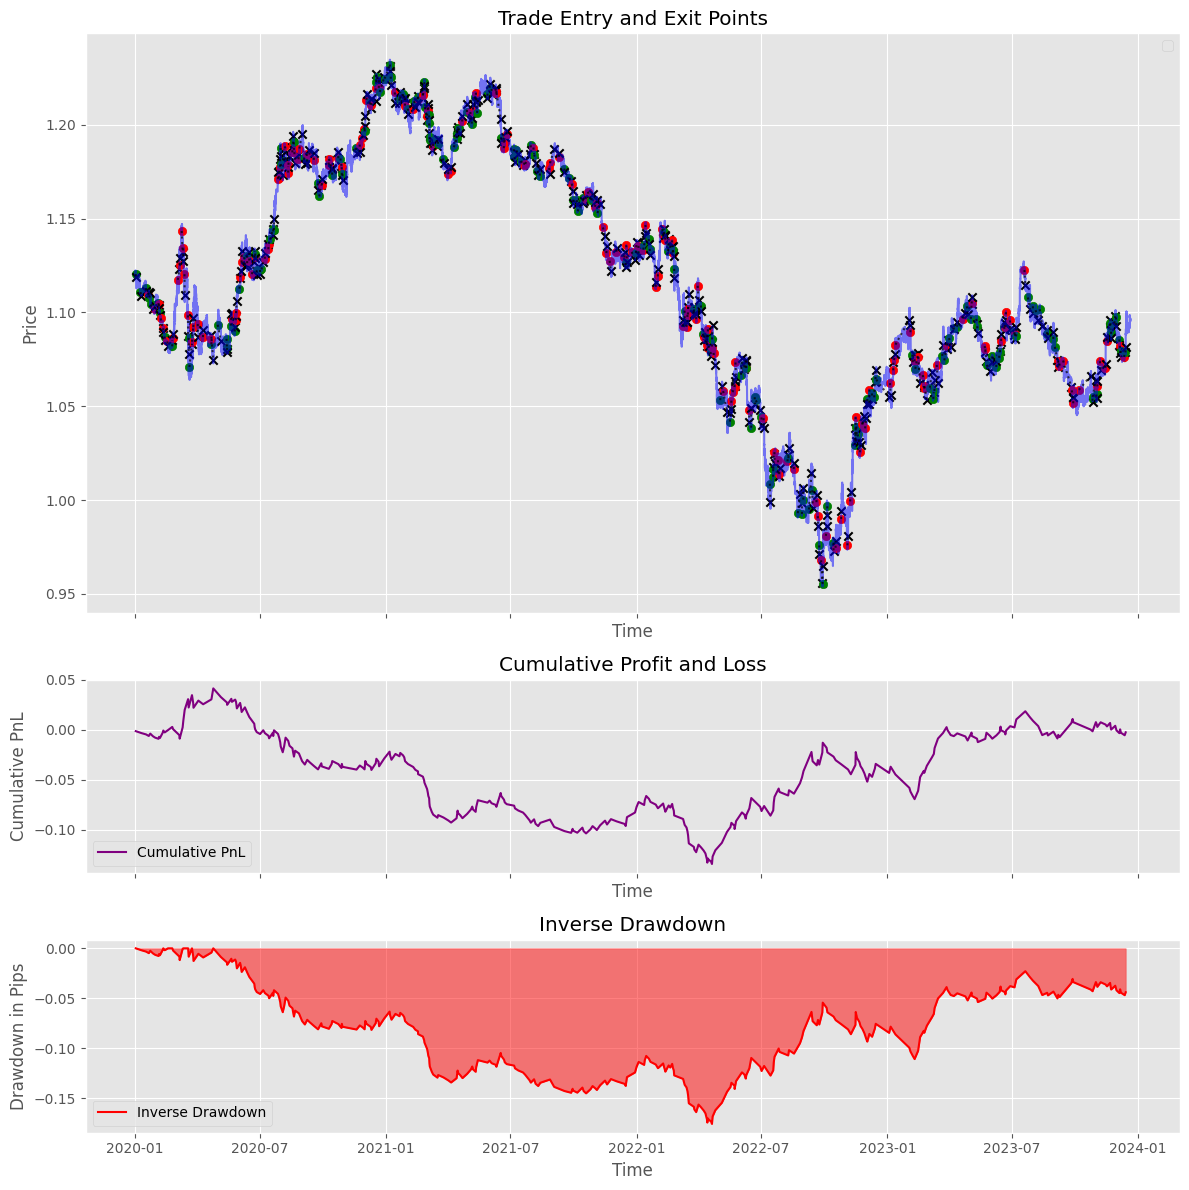

In [ ]:
plot_trades(history_book,df)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


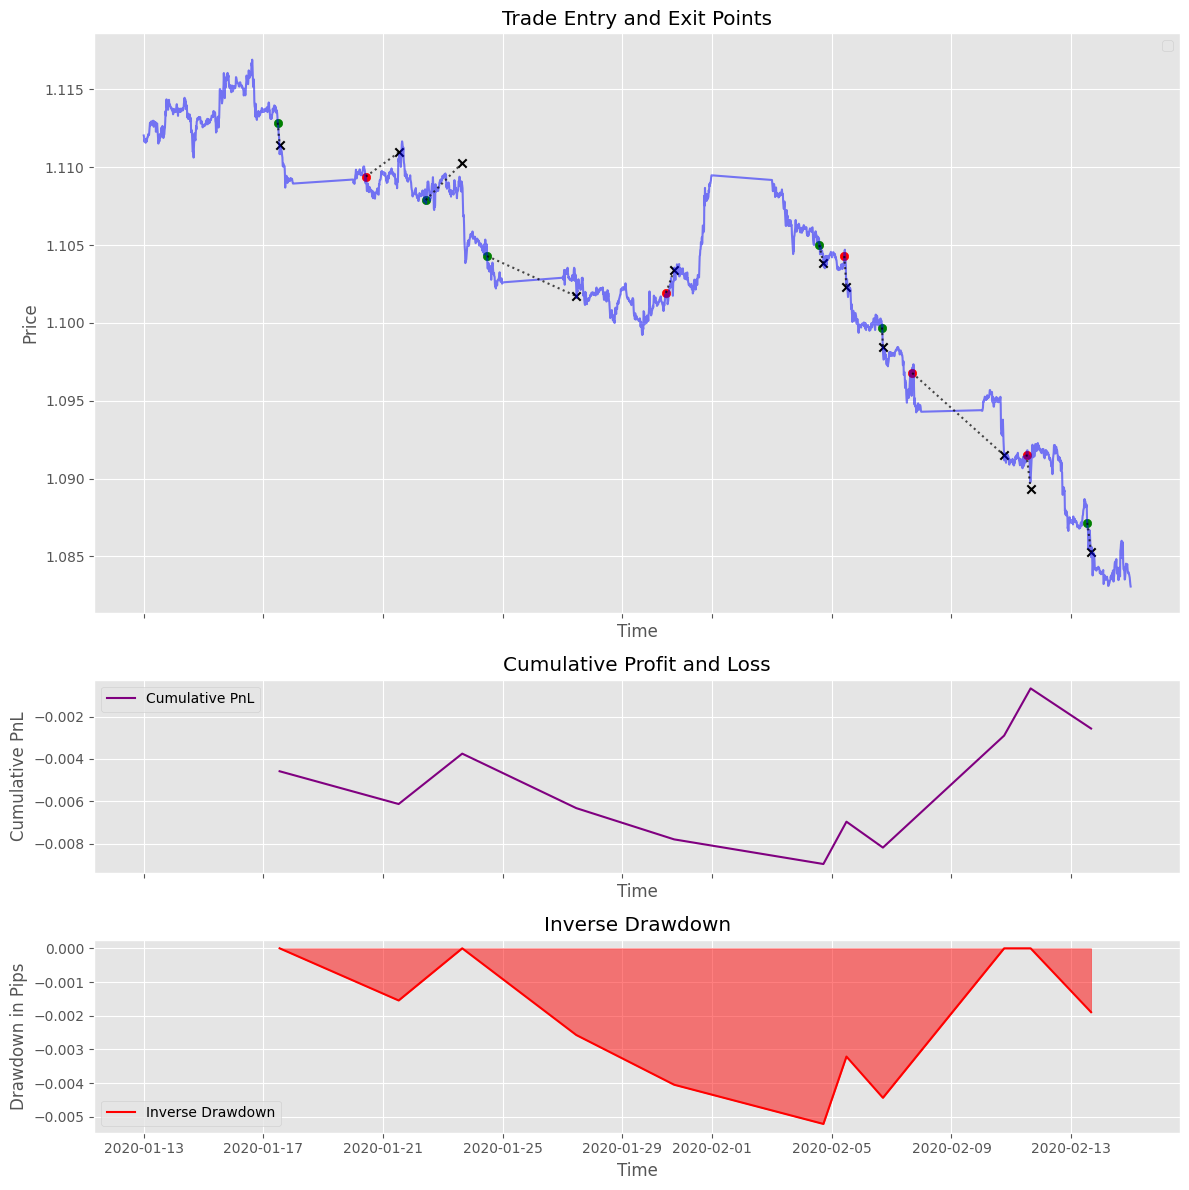

In [ ]:
plot_trades(history_book,df,'2020-01-11','2020-02-15')

In [ ]:
history_book

,Type,Entry Price,Exit Price,Entry Time,Exit Time,PnL,Cumulative Profit
0,Long,1.10858,1.11157,2020-01-20 11:00:00,2020-01-21 15:15:00,0.00299,0.00299
1,Short,1.10429,1.10229,2020-02-05 10:00:00,2020-02-05 11:45:00,0.00200,0.00499
2,Long,1.09334,1.08990,2020-02-10 15:45:00,2020-02-11 15:15:00,-0.00344,0.00155
3,Short,1.08636,1.09291,2020-02-25 17:45:00,2020-02-27 10:00:00,-0.00655,-0.00500
4,Short,1.11735,1.12728,2020-03-03 17:00:00,2020-03-06 10:30:00,-0.00993,-0.01493
...,...,...,...,...,...,...,...
57,Long,1.08898,1.08463,2023-08-22 13:15:00,2023-08-22 16:45:00,-0.00435,0.02776
58,Short,1.06282,1.05589,2023-10-11 16:45:00,2023-10-12 16:30:00,0.00693,0.03469
59,Short,1.05843,1.06245,2023-10-23 10:15:00,2023-10-23 17:15:00,-0.00402,0.03067
60,Short,1.08486,1.08800,2023-11-16 10:15:00,2023-11-16 15:45:00,-0.00314,0.02753
